In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path="/content/drive/My Drive/langchain"
os.chdir(path)
os.listdir(path)

['chatGPT调研报告.pdf', '.env', 'langchain.ipynb']

In [3]:
!pip install langchain-community langchain-zhipu python-dotenv pypdf pandas chromadb datasets ragas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [4]:
#step1_loader
from langchain_community.document_loaders import PyPDFLoader

from langchain_zhipu import ZhipuAIEmbeddings
from dotenv import load_dotenv

load_dotenv()


embeddings = ZhipuAIEmbeddings()
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma


loader = PyPDFLoader('chatGPT调研报告.pdf')

text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=10)

docs = loader.load_and_split(text_splitter)
print(docs)
print(len(docs))

chroma = Chroma(persist_directory="./chroma_db", embedding_function=embeddings)

chroma.add_documents(docs)
print("uploaded")

[Document(page_content='ChatGPT 调研报告\n（仅供内部参考）\n哈尔滨工业大学\n自然语言处理研究所（ HIT-NLP）2023 年 3 月 6 日更多⼲货请关注：公众号：历史的光影', metadata={'source': 'chatGPT调研报告.pdf', 'page': 0}), Document(page_content='ChatGPT 调研报告\n序言\n2022年11月30日，OpenAI 推出全新的对话式通用人工智能工具 ——\nChatGPT 。ChatGPT 表现出了非常惊艳的语言理解、生成、知识推理能力，\n它可以很好地理解用户意图，做到有效的多轮沟通，并且回答内容完整、重\n点清晰、有概括、有逻辑、有条理。 ChatGPT 上线后， 5天活跃用户数高达', metadata={'source': 'chatGPT调研报告.pdf', 'page': 1}), Document(page_content='100万，2个月活跃用户数已达 1个亿，成为历史上增长最快的消费者应用\n程序。除了被广大用户追捧外， ChatGPT 还受到了各国政府、企业界、学\n术界的广泛关注，使人们看到了解决自然语言处理这一认知智能核心问题的\n一条可能的路径，并被认为向通用人工智能迈出了坚实的一步，将对搜索引\n擎构成巨大的挑战，甚至将取代很多人的工作，更将颠覆很多领域和行业。', metadata={'source': 'chatGPT调研报告.pdf', 'page': 1}), Document(page_content='哈工大自然语言处理研究所组织多位老师和同学撰写了本调研报告，从\n技术原理、应用场景、未来发展等方面对 ChatGPT 进行了尽量详尽的介绍\n及总结。\n本报告仅供内部参考。\n主要编撰人员\n第一章由车万翔、杨沐昀、张伟男、赵妍妍、冯骁骋、孙承杰、李佳朋编\n写；第二章由张伟男、隋典伯、高翠芸、朱庆福、李明达、王雪松编写；第\n三章由刘铭、朱聪慧、汤步洲编写；第四章由徐永东、高翠芸、朱庆福编写；', metadata={'source': 'chatGPT调研报告.pdf', 'page': 1}), Document(page_content='第五章由杨沐昀、张伟男、韩一、庄子彧编写；第六章由隋

Generated answer for query 'ChatGPT的优势有哪些?': ChatGPT的优势主要包括以下几点：

1. **全面性能力**：ChatGPT以其全面的对话能力获得了用户的认可，能够处理多种类型的对话和问题。

2. **回答准确性**：相较于普通聊天机器人，ChatGPT能够提供更加准确的信息和回答，这得益于其背后强大的算法和大量的数据训练。

3. **生成流畅性**：ChatGPT生成的回答语言流畅，能够更好地模拟人类的对话方式，提供自然的交流体验。

4. **丰富的可玩性**：ChatGPT不仅可以用于日常的信息查询，还能进行有趣的对话互动，提供故事创作、诗歌生成等多样化的娱乐体验。

5. **自我学习能力**：通过机器学习，ChatGPT能够不断优化其回答，学习用户的偏好，并在此基础上提供更加个性化的服务。

6. **数据标注创新**：ChatGPT在排序过程中使用模型进行数据标注，减少了人工标注的需求，提高了效率和准确性。

7. **应用广泛性**：作为AIGC（AI Generated Content）的代表，ChatGPT不仅在人工智能领域产生重大影响，还被讨论应用于其他多个行业。

8. **市场接受度高**：自发布以来，ChatGPT以其出色的性能迅速获得了大量用户的认可和接受。

通过这些优势，ChatGPT在人工智能领域占据了一席之地，并在推动对话式AI技术的发展中起到了重要作用。
Dataset: {'question': ['ChatGPT的优势有哪些?'], 'answer': ['ChatGPT的优势主要包括以下几点：\n\n1. **全面性能力**：ChatGPT以其全面的对话能力获得了用户的认可，能够处理多种类型的对话和问题。\n\n2. **回答准确性**：相较于普通聊天机器人，ChatGPT能够提供更加准确的信息和回答，这得益于其背后强大的算法和大量的数据训练。\n\n3. **生成流畅性**：ChatGPT生成的回答语言流畅，能够更好地模拟人类的对话方式，提供自然的交流体验。\n\n4. **丰富的可玩性**：ChatGPT不仅可以用于日常的信息查询，还能进行有趣的对话互动，提供故事创作、诗歌生成等多样化的娱乐体验。\n\n5. **自我学习能力**：通过机器学习，ChatGPT能够不断

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

Evaluation result: {'faithfulness': 1.0000, 'context_precision': 1.0000, 'context_recall': 0.8333, 'answer_relevancy': 0.8389, 'character_overlap': 0.1567}
   faithfulness  context_precision  context_recall  answer_relevancy  \
0           1.0                1.0        0.833333          0.838873   

   character_overlap  
0           0.156682  


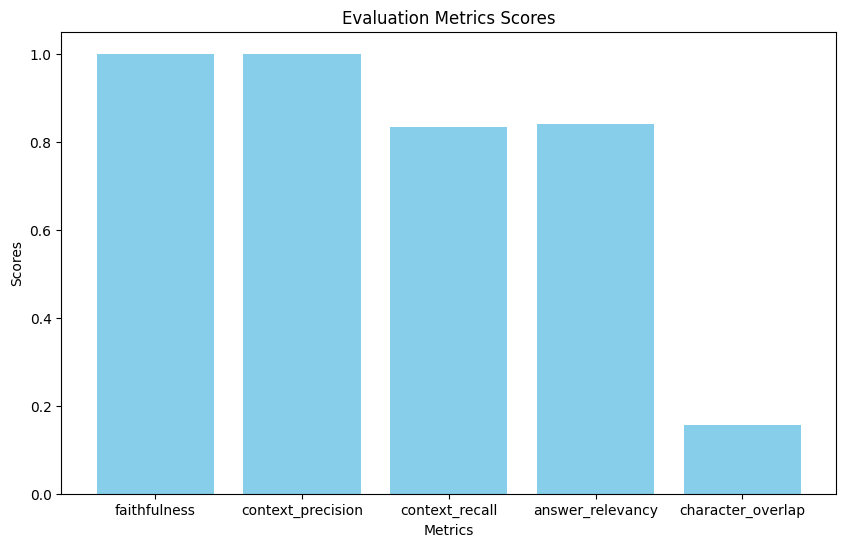

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from langchain_zhipu import ZhipuAIEmbeddings
from langchain_community.chat_models import ChatZhipuAI
from dotenv import load_dotenv
from langchain_community.vectorstores import Chroma
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import PromptTemplate
from datasets import Dataset
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
)
from ragas.metrics.base import Metric
from ragas.validation import EvaluationMode

# Define character overlap evaluation function
def character_overlap_score(generated, ground_truth):
    set_generated = set(generated)
    set_ground_truth = set(ground_truth)
    overlap = set_generated.intersection(set_ground_truth)
    return len(overlap) / max(len(set_generated), len(set_ground_truth))

class CharacterOverlapMetric(Metric):
    @property
    def name(self):
        return "character_overlap"

    @staticmethod
    def init(run_config=None):
        return CharacterOverlapMetric()

    async def _ascore(self, row, callbacks=None, is_async=True):
        return self.score(row)

    @property
    def evaluation_mode(self):
        return EvaluationMode.qa

    def score(self, row):
        return character_overlap_score(row["answer"], row["ground_truth"])

# Load environment variables
load_dotenv()

# Initialize embeddings and other components
embeddings = ZhipuAIEmbeddings()
chroma = Chroma(persist_directory="./chroma_db", embedding_function=embeddings)
retriever = chroma.as_retriever()

# Initialize ChatZhipuAI
chat = ChatZhipuAI(model="glm-4", temperature=0.5)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define prompt template
prompt = PromptTemplate.from_template("Based on {context}, please answer: {question}")

# Define retrieval and generation chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | chat
    | StrOutputParser()
)

# Define questions and ground truth answers
questions = ["ChatGPT的优势有哪些?"]
ground_truths = ["ChatGPT的优势有可玩性,流畅性,自我学习能力,数据标注创新,用户友好,快速响应"]

# Inference
answers = []
contexts = []

# Get answers and context
for query in questions:
    # Get answers and add to answers list
    answer = rag_chain.invoke(query)  # Assume it returns a string
    answers.append(answer)

    # Print generated answer for debugging
    print(f"Generated answer for query '{query}': {answer}")

    # Use invoke to get relevant document content
    relevant_documents = retriever.invoke(query)
    # Extract relevant document content and add to contexts list
    docs_content = [docs.page_content for docs in relevant_documents]
    contexts.append(docs_content)  # Add document content list to contexts

# Ensure all columns have consistent lengths
answers = answers[:len(questions)]
contexts = contexts[:len(questions)]

data = {
    "question": questions,
    "answer": answers,
    "contexts": contexts,
    "ground_truth": ground_truths
}

# Print the dataset for debugging
print(f"Dataset: {data}")

# Check if all columns have consistent lengths
assert len(data['question']) == len(data['answer']) == len(data['contexts']) == len(data['ground_truth']), "Column lengths are inconsistent"

# Convert dictionary to dataset
dataset = Dataset.from_dict(data)

# Evaluate with the custom metric included
character_overlap_metric = CharacterOverlapMetric()
result = evaluate(
    dataset,
    llm=chat,
    embeddings=embeddings,
    metrics=[
        faithfulness,
        context_precision,
        context_recall,
        answer_relevancy,
        character_overlap_metric
    ]
)

# Print the evaluation result for debugging
print(f"Evaluation result: {result}")

# Convert result to pandas DataFrame
if result:
    # Convert each scalar value in the result to a list containing that value
    for key in result:
        result[key] = [result[key]]

    df = pd.DataFrame(result)
    print(df)

    # Plot evaluation results
    metrics = ["faithfulness", "context_precision", "context_recall", "answer_relevancy", "character_overlap"]
    scores = [df["faithfulness"].mean(), df["context_precision"].mean(), df["context_recall"].mean(), df["answer_relevancy"].mean(), df["character_overlap"].mean()]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, scores, color='skyblue')
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Evaluation Metrics Scores')
    plt.show()
else:
    print("No evaluation results to display.")
